# Tomato Leaf disease classification

### Project Prerequisites

In [73]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Loading the training data

In [74]:
train_df = tf.keras.preprocessing.image_dataset_from_directory("Dataset/train",image_size=(256,256))
data_array = train_df.as_numpy_iterator()
batch = data_array.next()

Found 10000 files belonging to 10 classes.


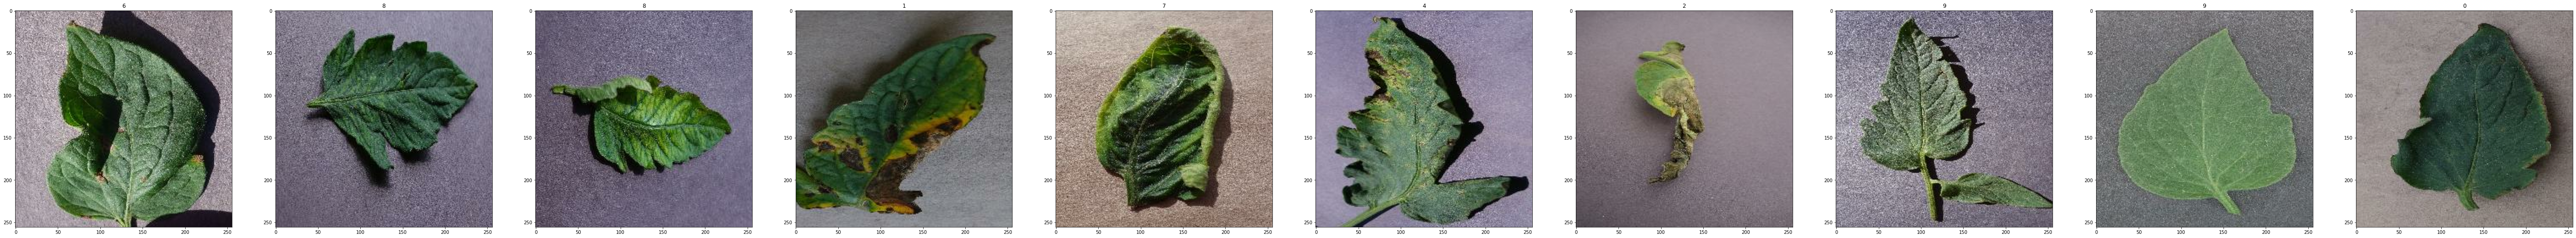

In [90]:
fig,ax = plt.subplots(ncols=10,figsize = (100,100))
for idx,img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocessing

In [84]:
datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    fill_mode="nearest"
)

preprocessed_train_data = datagen.flow_from_directory(
    "Dataset/train",
    target_size=(256,256),
    batch_size=32,
    class_mode="categorical")

preprocessed_val_data = datagen.flow_from_directory(
    "Dataset/val",
    target_size=(256,256),
    batch_size=16,
    class_mode="categorical")

Found 10000 images belonging to 10 classes.
Found 984 images belonging to 10 classes.


### Building the Neural Network 

In [77]:
model = tf.keras.models.Sequential()

##### first convolution layer

In [78]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3,input_shape = [256,256,3],activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

##### second convolution layer

In [79]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3,activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### Flattening and Output layer

In [80]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [81]:
model.compile(optimizer="adam",metrics = ["accuracy"],loss="CategoricalCrossentropy")
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               31490304  
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [85]:
tfc = tf.keras.callbacks.TensorBoard(log_dir="logs")

hist = model.fit(x=preprocessed_train_data,
                 validation_data=preprocessed_val_data,
                 validation_batch_size=16,
                 epochs=5,
                 batch_size=32,
                 callbacks=tfc
                 )

Epoch 1/5
313/313 [==============================] - 12s 37ms/step - loss: 0.1297 - accuracy: 0.9583 - val_loss: 0.5275 - val_accuracy: 0.8598
Epoch 2/5
313/313 [==============================] - 11s 35ms/step - loss: 0.1061 - accuracy: 0.9650 - val_loss: 0.4754 - val_accuracy: 0.8567
Epoch 3/5
313/313 [==============================] - 11s 34ms/step - loss: 0.0960 - accuracy: 0.9684 - val_loss: 0.5594 - val_accuracy: 0.8577
Epoch 4/5
313/313 [==============================] - 11s 34ms/step - loss: 0.1100 - accuracy: 0.9635 - val_loss: 0.5012 - val_accuracy: 0.8780
Epoch 5/5
313/313 [==============================] - 11s 36ms/step - loss: 0.0683 - accuracy: 0.9786 - val_loss: 0.5223 - val_accuracy: 0.8720


### Plotting the training history graph

No handles with labels found to put in legend.


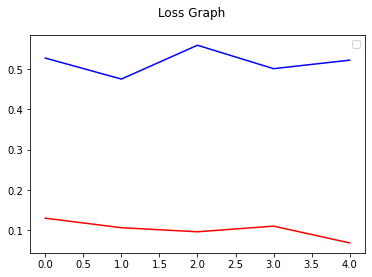

In [86]:
fig = plt.figure()
plt.plot(hist.history["loss"],color = "red")
plt.plot(hist.history["val_loss"],color = "blue")
fig.suptitle("Loss Graph")
plt.legend()
plt.show()

No handles with labels found to put in legend.


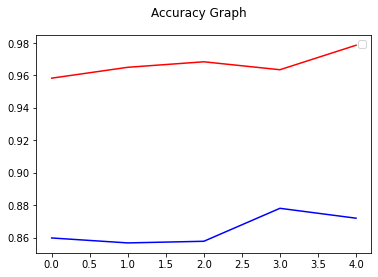

In [87]:
fig = plt.figure()
plt.plot(hist.history["accuracy"],color = "red")
plt.plot(hist.history["val_accuracy"],color = "blue")
fig.suptitle("Accuracy Graph")
plt.legend()
plt.show()